<a href="https://colab.research.google.com/github/Alfikriangelo/MachineLearningTasks/blob/main/3rdWeekTask/CreditDataSet_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [233]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
# Memuat dataset
file_path = 'sample_data/CreditDataset.csv'
data = pd.read_csv(file_path)

In [235]:
# Memeriksa nilai yang hilang
print("Nilai yang hilang per kolom:\n", data.isnull().sum())

Nilai yang hilang per kolom:
 x1       0
x2       0
x3       0
x4       0
x5       0
x6       0
x7       0
x8       0
x9       0
x10      0
x11      0
x12      0
x13      0
x14      0
x15      0
x16      0
x17      0
x18      0
x19      0
x20      0
Class    0
dtype: int64


In [236]:
# Menghapus baris dengan nilai yang hilang
data.dropna(inplace=True)

In [237]:
# Encode variabel kategori menggunakan LabelEncoder
label_encoders = {}
for column in data.columns:
    if data[column].dtype == object:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [238]:
# Memisahkan dataset menjadi fitur (X) dan target (y)
X = data.drop(columns='Class')
y = data['Class']

In [239]:
# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [240]:
# Memisahkan data menjadi set training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)


In [241]:
# Menyesuaikan nilai target dari {1, 2} menjadi {0, 1} untuk klasifikasi biner
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

In [242]:
# Membangun model Random Forest untuk menghindari overfitting
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)  # Mengatur parameter untuk mencegah overfitting
rf_classifier.fit(X_train, y_train_adjusted)

RandomForestClassifier(max_depth=10, random_state=42)

In [243]:
# Memprediksi hasil pada data test
y_pred_adjusted = rf_classifier.predict(X_test)
y_prob_adjusted = rf_classifier.predict_proba(X_test)[:, 1]

In [244]:
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test_adjusted, y_pred_adjusted)
conf_matrix = confusion_matrix(y_test_adjusted, y_pred_adjusted)
class_report = classification_report(y_test_adjusted, y_pred_adjusted)
roc_auc = roc_auc_score(y_test_adjusted, y_prob_adjusted)
fpr, tpr, _ = roc_curve(y_test_adjusted, y_prob_adjusted)

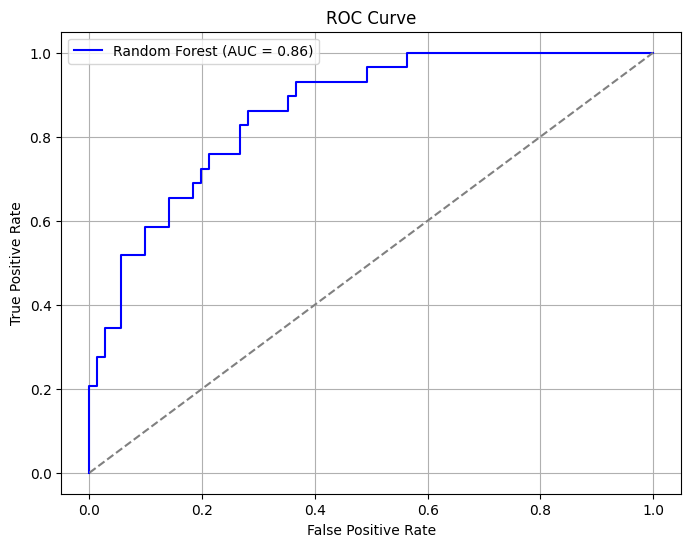

In [245]:
# Menampilkan ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

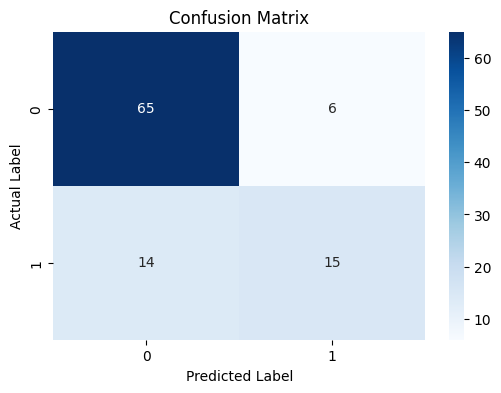

In [246]:
# Menampilkan Confusion Matrix dalam bentuk heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [247]:
# Menampilkan hasil evaluasi
print("Akurasi:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("AUC Score:", roc_auc)

Akurasi: 0.8
Confusion Matrix:
 [[65  6]
 [14 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87        71
           1       0.71      0.52      0.60        29

    accuracy                           0.80       100
   macro avg       0.77      0.72      0.73       100
weighted avg       0.79      0.80      0.79       100

AUC Score: 0.8610976202039825
